In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Load the data
path = 'data/run_labels.csv'
df = pd.read_csv(path)
# カラム名を上書き
columns = ['accelX1', 'accelY1', 'accelZ1', 'gyroX1', 'gyroY1', 'gyroZ1', 'accelX2', 'accelY2', 'accelZ2', 'gyroX2', 'gyroY2', 'gyroZ2', 'label']
df.columns = columns
df.head()

,accelX1,accelY1,accelZ1,gyroX1,gyroY1,gyroZ1,accelX2,accelY2,accelZ2,gyroX2,gyroY2,gyroZ2,label
0,-857.733215,74.859207,660.861816,-972.125,-59543.750,23652.125,-729.974792,-17.799801,791.121216,9044.875,-59287.375,21627.375,something
1,-616.221985,-40.784599,806.871460,-1684.375,-2689.750,-3355.625,-469.578033,-105.920395,896.712219,-1595.125,-2821.000,-3314.500,something
2,-615.550964,-44.090801,805.785645,-1175.125,-2099.125,-2902.375,-469.151031,-108.823997,895.565430,-1106.875,-2175.250,-2996.875,something
3,-614.904419,-46.152599,805.505066,-608.125,-1249.500,-2566.375,-468.760590,-110.592995,895.089661,-620.375,-1253.000,-2643.375,something
4,-615.258179,-47.433601,807.457092,317.625,784.000,-1666.000,-468.919250,-111.934998,897.078247,249.375,819.875,-1872.500,something


In [16]:
# 新たな特徴量を作る
accel_norm = (np.sqrt(df['accelX1']**2 + df['accelY1']**2 + df['accelZ1']**2) + np.sqrt(df['accelX2']**2 + df['accelY2']**2 + df['accelZ2']**2)) / 2
gyro_norm = (np.sqrt(df['gyroX1']**2 + df['gyroY1']**2 + df['gyroZ1']**2) + np.sqrt(df['gyroX2']**2 + df['gyroY2']**2 + df['gyroZ2']**2)) / 2
# 定数でスケールを1前後にする
df['accel_norm'] = accel_norm / 2000
df['gyro_norm'] = gyro_norm / 300000
df.head()

,accelX1,accelY1,accelZ1,gyroX1,gyroY1,gyroZ1,accelX2,accelY2,accelZ2,gyroX2,gyroY2,gyroZ2,label,accel_norm,gyro_norm
0,-857.733215,74.859207,660.861816,-972.125,-59543.750,23652.125,-729.974792,-17.799801,791.121216,9044.875,-59287.375,21627.375,something,0.540493,0.213051
1,-616.221985,-40.784599,806.871460,-1684.375,-2689.750,-3355.625,-469.578033,-105.920395,896.712219,-1595.125,-2821.000,-3314.500,something,0.508460,0.015424
2,-615.550964,-44.090801,805.785645,-1175.125,-2099.125,-2902.375,-469.151031,-108.823997,895.565430,-1106.875,-2175.250,-2996.875,something,0.507952,0.012725
3,-614.904419,-46.152599,805.505066,-608.125,-1249.500,-2566.375,-468.760590,-110.592995,895.089661,-620.375,-1253.000,-2643.375,something,0.507719,0.009848
4,-615.258179,-47.433601,807.457092,317.625,784.000,-1666.000,-468.919250,-111.934998,897.078247,249.375,819.875,-1872.500,something,0.508668,0.006546


In [17]:
# accel_normとgyro_normの最大値を取得
accel_max = df['accel_norm'].max()
gyro_max = df['gyro_norm'].max()
print('accel_max:', accel_max)
print('gyro_max:', gyro_max)

accel_max: 1.0321327528146027
gyro_max: 1.038431808263156


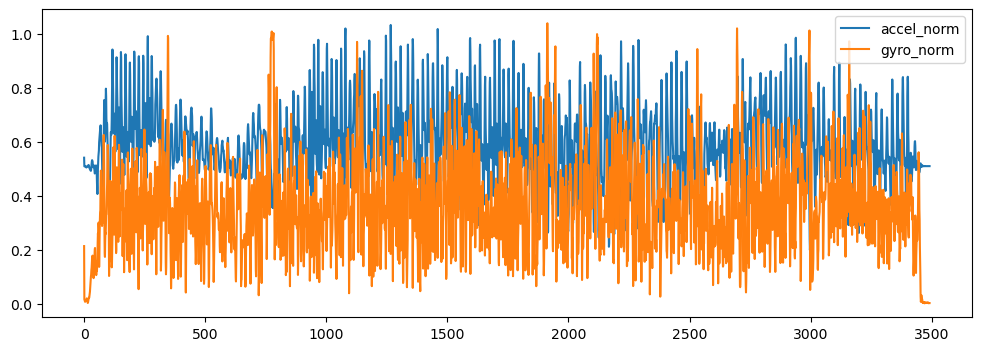

In [18]:
# accel_normとgyro_normをプロット
plt.figure(figsize=(12, 4))
plt.plot(df['accel_norm'], label='accel_norm')
plt.plot(df['gyro_norm'], label='gyro_norm')
plt.legend()
plt.show()